In [74]:
import cv2, mss, mss.tools, cv2, imutils, pyautogui, numpy as np, matplotlib.pyplot as plt, os
from pytesseract import pytesseract
from selenium.webdriver.chrome.options import Options
from time import sleep
from selenium import webdriver
from pytesseract import Output
pytesseract.tesseract_cmd = r"F:\Program Files\Tesseract-OCR\tesseract.exe"

In [75]:
def get_screenshot(filename="image.tif", url="https://gg.bet/en/"):
    chrome_options = Options()
    chrome_options.add_argument("--disable-infobars")
    chrome_options.add_argument("--start-maximized")
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option('useAutomationExtension', False)
    chrome_options.add_argument(r"user-data-dir=C:\Users\gkerr\AppData\Local\Google\Chrome\User Data\Ninja")
    driver = webdriver.Chrome(executable_path=r'C:\Users\gkerr\Desktop\vs-code\webscraping\chromedriver.exe', options=chrome_options)
    driver.get(url)
    sleep(5)
    screenshot = pyautogui.screenshot()
    screenshot.save(os.path.join('screenshots', filename))
    sleep(1)
    driver.close()
get_screenshot()

C:\Users\gkerr\AppData\Local\Temp\ipykernel_22848\3523347682.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'C:\Users\gkerr\Desktop\vs-code\webscraping\chromedriver.exe', options=chrome_options)


In [79]:
def get_winner_pos(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    positions = []
    for i, word in enumerate(d['text']):
        if word == "Winner":
            pos = d['top'][i], d['left'][i]
            positions.append(pos)
    return positions

In [85]:
img = cv2.imread('screenshots\image.tif', cv2.IMREAD_GRAYSCALE)
positions = get_winner_pos(img)
pos = positions[0]

(386, 1013)

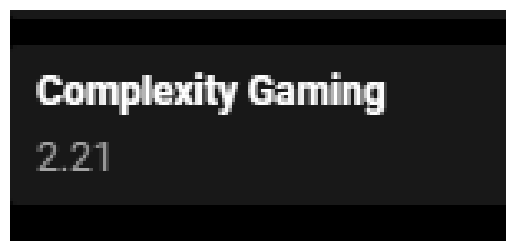

In [112]:
def get_T1_img(img):
    p1 = 30, 0
    p2 = 100,150
    return img[pos[0]+p1[0]:pos[0]+p2[0], pos[1]+p1[1]:pos[1]+p2[1]]
def get_T2_img(img):
    p1 = 90, 0
    p2 = 160,150
    return img[pos[0]+p1[0]:pos[0]+p2[0], pos[1]+p1[1]:pos[1]+p2[1]]

In [123]:
def append_dict(img):
    i1 = get_T1_img(img)
    i2 = get_T2_img(img)
    strings = pytesseract.image_to_string(i1).split("\n"), pytesseract.image_to_string(i2).split("\n")
    team1 = strings[0][0]
    team2 = strings[1][0]
    dict = {team1: [], team2: []}
    for i in range(int(len(strings)/2)):
        team1_str = strings[2*i][1]
        team2_str = strings[2*i+1][1]
        if '.' not in team1_str and team2_str >1.1:
            team1_str = team1_str[:1] + '.' + team1_str[1:] 
        if '.' not in team2_str and team1_str >1.1:
            team2_str = team2_str[:1] + '.' + team2_str[1:]
        team1_odds = float(team1_str)
        team2_odds = float(team2_str)
        dict[team1].append(team1_odds)
        dict[team2].append(team2_odds)


{'ENCE ESports': [1.62], 'Complexity Gaming': [2.21]}